# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [6]:
# Import relevant libraries
from splinter import Browser
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [13]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')

In [14]:
# Extract all rows of data
rows = table.find_all('tr')[1:] 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [17]:
# Create an empty list
# Extract headers
headers = [th.text for th in table.find('tr').find_all('th')]
    
# If there are no 'th' elements, use the first 'tr' as headers
if not headers:
        headers = [th.text for th in table.find('tr').find_all('td')]
    
# Extract rows excluding the header
rows = table.find_all('tr')[1:]  # Adjust indexing if headers are part of 'rows'
    
data = []
for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])  # Get rid of empty values

In [19]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temperature_df = pd.DataFrame(data, columns=headers)


In [20]:
# Confirm DataFrame was created successfully
print(mars_temperature_df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
mars_temperature_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [24]:
# Assuming your DataFrame is named mars_temperature_df and has the columns as mentioned
# Convert 'terrestrial_date' to datetime
mars_temperature_df['terrestrial_date'] = pd.to_datetime(mars_temperature_df['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' to int64
mars_temperature_df['sol'] = mars_temperature_df['sol'].astype('int64')
mars_temperature_df['ls'] = mars_temperature_df['ls'].astype('int64')
mars_temperature_df['month'] = mars_temperature_df['month'].astype('int64')

# Convert 'min_temp' and 'pressure' to float64
mars_temperature_df['min_temp'] = mars_temperature_df['min_temp'].astype('float64')
mars_temperature_df['pressure'] = mars_temperature_df['pressure'].astype('float64')

# Verify the changes in data types
mars_temperature_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [25]:
# Confirm type changes were successful by examining data types again
mars_temperature_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [27]:
# 1. How many months are there on Mars?
number_of_months_on_mars = mars_temperature_df['month'].nunique()
print(f"There are {number_of_months_on_mars} unique months represented in the Mars temperature dataset.")


There are 12 unique months represented in the Mars temperature dataset.


In [28]:
# 2. How many Martian days' worth of data are there?
# Count the number of unique Martian days (sols) in the dataset
number_of_martian_days = mars_temperature_df['sol'].nunique()

# Print the result
print(f"There are {number_of_martian_days} Martian days' worth of data in the dataset.")


There are 1867 Martian days' worth of data in the dataset.


In [29]:
# 3. What is the average low temperature by month?
# Group the data by 'month' and calculate the average 'min_temp' for each month
average_low_temp_by_month = mars_temperature_df.groupby('month')['min_temp'].mean()

# Print the result
print("Average low temperature by month on Mars:")
print(average_low_temp_by_month)


Average low temperature by month on Mars:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


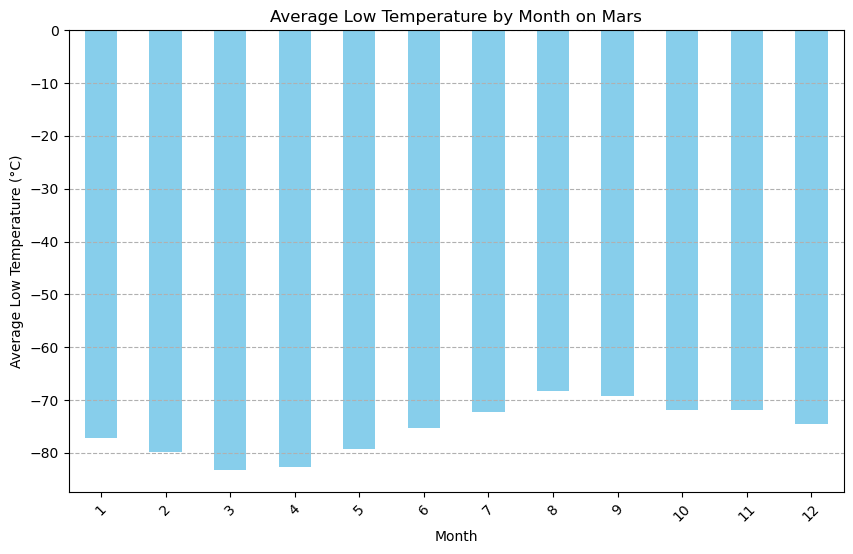

In [30]:
# Plot the average temperature by month
# Plotting the average low temperature by month
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
average_low_temp_by_month.plot(kind='bar', color='skyblue')  # Create a bar chart

plt.title('Average Low Temperature by Month on Mars')  # Add a title
plt.xlabel('Month')  # Label the x-axis
plt.ylabel('Average Low Temperature (°C)')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--')  # Add horizontal grid lines for reference

plt.show()  # Display the plot

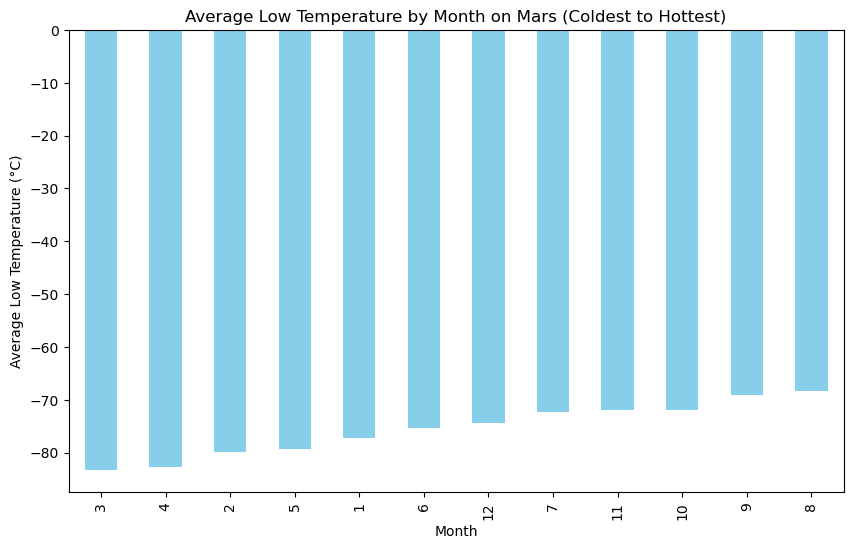

In [32]:
# Identify the coldest and hottest months in Curiosity's location
# Organize the average low temperatures from coldest to hottest month
average_low_temp_by_month_sorted = average_low_temp_by_month.sort_values()

# Plot the sorted average low temperatures
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
average_low_temp_by_month_sorted.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Average Low Temperature by Month on Mars (Coldest to Hottest)')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')

# Show the plot
plt.show()


In [33]:
# 4. Average pressure by Martian month
# Group the data by 'month' and calculate the average 'pressure' for each month
average_pressure_by_month = mars_temperature_df.groupby('month')['pressure'].mean()

# Print the result
print("Average pressure by month on Mars:")
print(average_pressure_by_month)


Average pressure by month on Mars:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


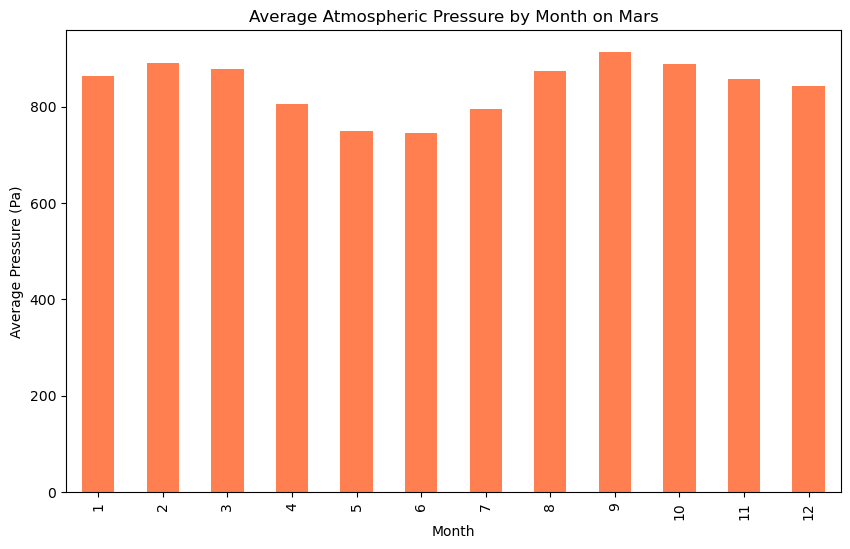

In [35]:
# Plot the average pressure by month
# Plotting the average pressure by month
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
average_pressure_by_month.plot(kind='bar', color='coral')

# Add titles and labels
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')

# Show the plot
plt.show()

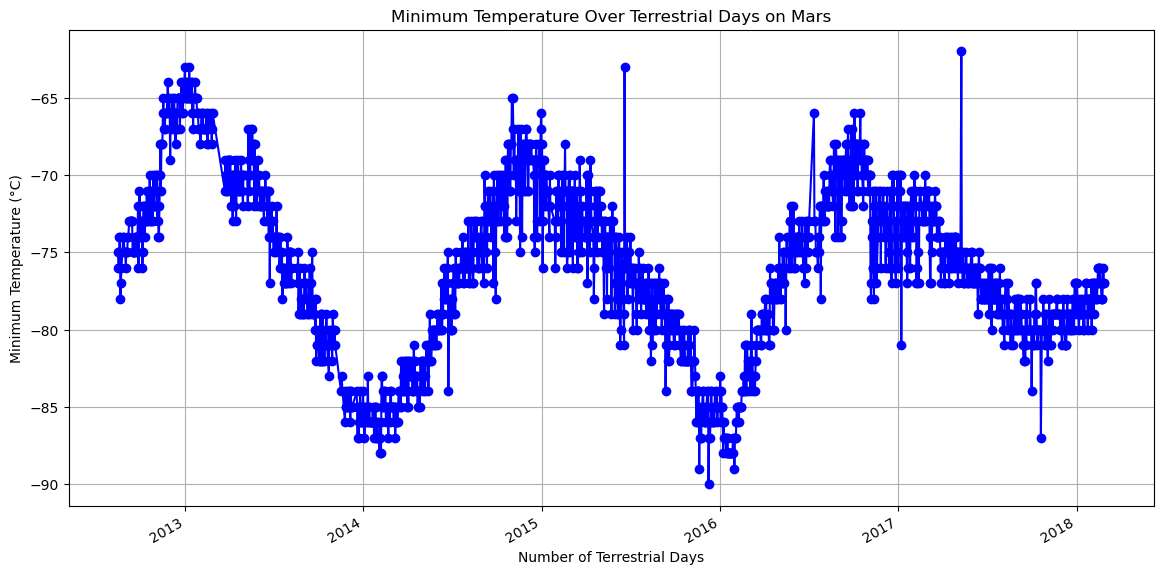

In [36]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the graph with 'terrestrial_date' on the x-axis and 'min_temp' on the y-axis
plt.figure(figsize=(14, 7))  # Set the figure size for better readability
plt.plot(mars_temperature_df['terrestrial_date'], mars_temperature_df['min_temp'], marker='o', linestyle='-', color='blue')

plt.title('Minimum Temperature Over Terrestrial Days on Mars')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)  # Adding a grid for better readability

# Optionally, format the date axis to make it more readable
plt.gcf().autofmt_xdate()  # Auto format the dates on the x-axis for better readability

# Show the plot
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [37]:
# Write the data to a CSV
mars_temperature_df.to_csv('mars_temperature_data.csv', index=False)


In [21]:
browser.quit()